# Name - Sadia Sultana

Id - 2135191050

# Assignment on data warehouse

In [18]:
import psycopg2
import pandas as pd
import psycopg2.extras
import matplotlib.pyplot as plt
import numpy as np

In [19]:
#!pip install pandas

In [20]:
import pandas as pd

In [21]:
#import psycopg2
#import pandas as pd
#import psycopg2.extras

In [22]:
#!pip install psycopg2

In [23]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database = "postgres",
                                          user = "postgres",
                                          password = "saffat",
                                          host = "127.0.0.1",
                                          port = "5432")
    def getConnection(self):
        print("Successfully connected to database")
        return self.connection

In [24]:
con = PostgresConnection().getConnection()

Successfully connected to database


In [25]:
# !pip install psycopg2

# Data Extraction

In [78]:
trans_dim = pd.read_excel(r'C:/Users/mimsr/Desktop/e_commerce_system/e_commerce_system/Scripts/e-commerece_data.xlsx',sheet_name = 'Trans_dim',engine = 'openpyxl')

In [79]:
!pip install openpyxl


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
trans_dim

,payment_key,trans_type,bank_name
0,P001,cash,NaN
1,P002,card,AB Bank Limited
2,P003,card,Bangladesh Commerce Bank Limited
3,P004,card,Bank Asia Limited
4,P005,card,BRAC Bank Limited
5,P006,card,Citizens Bank Limited
6,P007,card,City Bank Limited
7,P008,card,Community Bank Bangladesh Limited
8,P009,card,Dhaka Bank Limited
9,P010,card,Dutch-Bangla Bank Limited


# Load

In [33]:
con = PostgresConnection().getConnection()
insert_stmt='''INSERT INTO ecomdb.trans_dim(payment_key, trans_type,bank_name)
               VALUES (%s, %s, %s)'''
cur = con.cursor()
psycopg2.extras.execute_batch(cur, insert_stmt, trans_dim.values)
con.commit()
cur.close()

Successfully connected to database


UniqueViolation: duplicate key value violates unique constraint "pk_1"
DETAIL:  Key (payment_key)=(P001) already exists.


In [34]:
item_dim = pd.read_excel(r'C:/Users/mimsr/Desktop/e_commerce_system/e_commerce_system/Scripts/e-commerece_data.xlsx',sheet_name = 'Item_dim',engine = 'openpyxl')

In [35]:
item_dim

,item_key,item_name,desc,unit_price,man_country,supplier,unit
0,I00001,A&W Root Beer - 12 oz cans,a. Beverage - Soda,11.50,Netherlands,Bolsius Boxmeer,cans
1,I00002,A&W Root Beer Diet - 12 oz cans,a. Beverage - Soda,6.75,poland,CHROMADURLIN S.A.S,cans
2,I00003,Barq's Root Beer - 12 oz cans,a. Beverage - Soda,6.75,Bangladesh,DENIMACH LTD,cans
3,I00004,Cherry Coke 12oz,a. Beverage - Soda,6.75,Netherlands,Bolsius Boxmeer,cans
4,I00005,Cherry Coke Zero 12 pack,a. Beverage - Soda,6.75,Finland,HARDFORD AB,cans
...,...,...,...,...,...,...,...
259,I00260,Napkins Square Lunch,Kitchen Supplies,15.00,Cambodia,NINGBO SEDUNO IMP & EXP CO.LTD,ct
260,I00261,POM 2 ply paper towels,Kitchen Supplies,33.00,Lithuania,BIGSO AB,ct
261,I00262,Strong Everyday Napkins,Kitchen Supplies,14.00,Netherlands,Bolsius Boxmeer,ct
262,I00263,Advil 2 pill packets,Medicine,14.00,Lithuania,BIGSO AB,Ct


In [36]:
con = PostgresConnection().getConnection()
insert_stmt='''INSERT INTO ecomdb.item_dim(item_key, item_name, _desc, unit_price, man_country, supplier, unit)
               VALUES (%s, %s, %s, %s, %s, %s, %s)'''
cur = con.cursor()
psycopg2.extras.execute_batch(cur, insert_stmt, item_dim.values)
con.commit()
cur.close()

Successfully connected to database


UniqueViolation: duplicate key value violates unique constraint "pk_2"
DETAIL:  Key (item_key)=(I00001) already exists.


In [45]:
coustomer_dim = pd.read_excel(r'C:/Users/mimsr/Desktop/e_commerce_system/e_commerce_system/Scripts/e-commerece_data.xlsx',sheet_name = 'Coustomer_dim',engine = 'openpyxl')

In [46]:
coustomer_dim

,coustomer_key,name,contact_no,nid
0,C000001,sumit,8801920345851,7505075708899
1,C000002,tammanne,8801817069329,1977731324842
2,C000003,kailash kumar,8801663795774,3769494056318
3,C000004,bhagwati prasad,8801533627961,9378834712725
4,C000005,ajay,8801943715786,3540815556323
...,...,...,...,...
9186,C009187,smt radha,8801563029753,1057824928189
9187,C009188,tulsi sharma,8801794982266,7970880905205
9188,C009189,madhubala,8801890032435,3101930298150
9189,C009190,pintu devi,8801563290767,7234328323528


In [46]:
con = PostgresConnection().getConnection()
insert_stmt='''INSERT INTO ecomdb.coustomer_dim(coustomer_key, name, contact_no, nid)
               VALUES (%s, %s, %s, %s)'''
cur = con.cursor()
psycopg2.extras.execute_batch(cur, insert_stmt, coustomer_dim.values)
con.commit()
cur.close()

Successfully connected to database


UniqueViolation: duplicate key value violates unique constraint "pk_3"
DETAIL:  Key (coustomer_key)=(C000001) already exists.


In [162]:
time_dim = pd.read_excel(r'C:/Users/mimsr/Desktop/e_commerce_system/e_commerce_system/Scripts/e-commerece_data.xlsx',sheet_name = 'Time_dim',engine = 'openpyxl')

In [163]:
time_dim['date'].dtype

dtype('O')

In [49]:
con = PostgresConnection().getConnection()
insert_stmt='''INSERT INTO ecomdb.time_dim(time_key, date, hour, day, week, month, quarter, year)
               VALUES (%s, %s, %s, %s, %s, %s, %s, %s)'''
cur = con.cursor()
psycopg2.extras.execute_batch(cur, insert_stmt, time_dim.values)
con.commit()
cur.close()

Successfully connected to database


DatetimeFieldOverflow: date/time field value out of range: "20-05-2017 14:56"
LINE 2:                VALUES ('T00001', '20-05-2017 14:56', 14, 20,...
                                         ^
HINT:  Perhaps you need a different "datestyle" setting.


# Transformation

In [166]:
time_dim['date'] = pd.to_datetime(time_dim['date'], format='%d-%m-%Y %H:%M').dt.tz_localize('UTC')

TypeError: Already tz-aware, use tz_convert to convert.

In [167]:
time_dim

,time_key,date,hour,day,week,month,quarter,year
0,T00001,2017-05-20 14:56:00+00:00,14,20,3rd Week,5,Q2,2017
1,T00002,2015-01-30 22:14:00+00:00,22,30,4th Week,1,Q1,2015
2,T00003,2020-03-14 02:34:00+00:00,2,14,2nd Week,3,Q1,2020
3,T00004,2018-04-27 12:19:00+00:00,12,27,4th Week,4,Q2,2018
4,T00005,2018-04-14 10:43:00+00:00,10,14,2nd Week,4,Q2,2018
...,...,...,...,...,...,...,...,...
99994,T099995,2015-01-04 17:22:00+00:00,17,4,1st Week,1,Q1,2015
99995,T099996,2015-01-17 21:09:00+00:00,21,17,3rd Week,1,Q1,2015
99996,T099997,2020-01-23 14:42:00+00:00,14,23,4th Week,1,Q1,2020
99997,T099998,2015-10-31 13:52:00+00:00,13,31,4th Week,10,Q4,2015


# Load

In [50]:
store_dim = pd.read_excel(r'C:/Users/mimsr/Desktop/e_commerce_system/e_commerce_system/Scripts/e-commerece_data.xlsx',sheet_name = 'Store_dim',engine = 'openpyxl')

In [51]:
store_dim

,store_key,division,district,upazila
0,S0001,SYLHET,HABIGANJ,AJMIRIGANJ
1,S0002,SYLHET,HABIGANJ,BAHUBAL
2,S0003,SYLHET,HABIGANJ,BANIACHONG
3,S0004,SYLHET,HABIGANJ,CHUNARUGHAT
4,S0005,SYLHET,HABIGANJ,HABIGANJ SADAR
...,...,...,...,...
721,S00722,BARISAL,BARISAL,HIZLA
722,S00723,BARISAL,BARISAL,BARISAL SADAR (KOTWALI)
723,S00724,BARISAL,BARISAL,MEHENDIGANJ
724,S00725,BARISAL,BARISAL,MULADI


In [54]:
con = PostgresConnection().getConnection()
insert_stmt='''INSERT INTO ecomdb.store_dim(store_key, division, district, upazila)
               VALUES (%s, %s, %s, %s)'''
cur = con.cursor()
psycopg2.extras.execute_batch(cur, insert_stmt, store_dim.values)
con.commit()
cur.close()

Successfully connected to database


UniqueViolation: duplicate key value violates unique constraint "pk_5"
DETAIL:  Key (store_key)=(S0001) already exists.


In [52]:
fact_table = pd.read_excel(r'C:/Users/mimsr/Desktop/e_commerce_system/e_commerce_system/Scripts/e-commerece_data.xlsx',sheet_name = 'Fact_table',engine = 'openpyxl')

In [53]:
fact_table

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0
1,P022,C008967,T041209,I00248,S00595,1,rolls,26.0,26.0
2,P030,C007261,T03633,I00195,S00496,8,ct,12.5,100.0
3,P032,C007048,T084631,I00131,S0086,8,ct,14.0,112.0
4,P014,C006430,T071276,I00050,S00488,8,cans,8.0,64.0
...,...,...,...,...,...,...,...,...,...
999995,P010,C003726,T09247,I00063,S00502,5,cans,40.0,200.0
999996,P021,C002581,T023483,I00252,S00225,1,ct,11.0,11.0
999997,P035,C006133,T039372,I00119,S00555,7,ct,53.0,371.0
999998,P031,C008735,T097975,I00257,S00440,2,ct,21.0,42.0


In [56]:
con = PostgresConnection().getConnection()
insert_stmt='''INSERT INTO ecomdb.fact_table(payment_key, coustomer_key, time_key, item_key, store_key, quantity, unit, unit_price, total_price)
               VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)'''
cur = con.cursor()
psycopg2.extras.execute_batch(cur, insert_stmt, fact_table.values)
con.commit()
cur.close()

Successfully connected to database


UniqueViolation: duplicate key value violates unique constraint "pk_6"
DETAIL:  Key (item_key, store_key, time_key, payment_key, coustomer_key)=(I00177, S00307, T049189, P026, C004510) already exists.


# OlAP Query

# Q1:

In [80]:
cur = con.cursor()
query = '''select s.division, sum(f.total_price)
from ecomdb.fact_table f 
join ecomdb.store_dim s on s.store_key = f.store_key 
group by (s.division)
order by s.division'''
cur.execute(query)
records = cur.fetchall()
#records

In [81]:
query_1a = pd.DataFrame(list(records),columns = ['division','total_price'])
query_1a

,division,total_price
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25


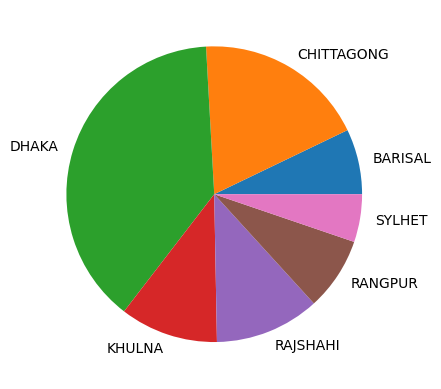

In [82]:
#import matplotlib.pyplot as plt
#import numpy as np

plt.pie(query_1a.total_price, labels = query_1a.division)
#plt.legend()
plt.show()

In [83]:
#!pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [84]:
cur = con.cursor()
query = '''select s.district, sum(f.total_price)
        from ecomdb.fact_table f 
        join ecomdb.store_dim s on s.store_key = f.store_key 
        group by (s.district)
        order by s.district'''
cur.execute(query)
records = cur.fetchall()

In [85]:
query_1b = pd.DataFrame(list(records),columns = ['district','total_price'])
query_1b

,district,total_price
0,BAGERHAT,1307651.00
1,BANDARBAN,995360.75
2,BARGUNA,869041.00
3,BARISAL,2897237.75
4,BHOLA,1012205.75
...,...,...
59,SIRAJGANJ,1295100.75
60,SUNAMGANJ,1593774.00
61,SYLHET,1727717.25
62,TANGAIL,1774650.25


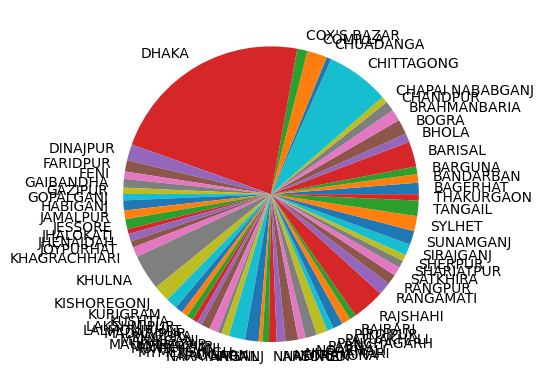

In [86]:
#import matplotlib.pyplot as plt
#import numpy as np

plt.pie(query_1b.total_price, labels = query_1b.district)
# plt.pie(query_1.total_price,query_1.district)
#plt.legend()
plt.show()

In [87]:
cur = con.cursor()
query = '''select s.year , sum(f.total_price)
           from ecomdb.fact_table f 
           join ecomdb.time_dim s on s.time_key = f.time_key
           group by (s.year)
           order by s.year'''
cur.execute(query)
records = cur.fetchall()
# records

In [88]:
query_1c = pd.DataFrame(list(records),columns = ['year','total_price'])
query_1c

,year,total_price
0,2014,14334731.25
1,2015,15095720.25
2,2016,14976508.25
3,2017,15015806.00
4,2018,15108197.25
5,2019,14949510.25
6,2020,15037190.25
7,2021,883772.25


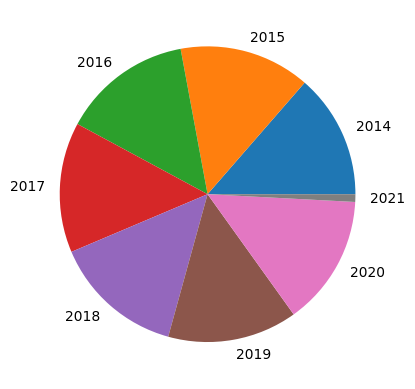

In [89]:
plt.pie(query_1c.total_price, labels = query_1c.year)
# plt.pie(query_1.total_price,query_1.district)
#plt.legend()
plt.show()

In [90]:
cur = con.cursor()
query = '''select s.month , sum(f.total_price)
           from ecomdb.fact_table f 
           join ecomdb.time_dim s on s.time_key = f.time_key
           group by (s.month)
           order by s.month'''
cur.execute(query)
records = cur.fetchall()

In [91]:
query_1d = pd.DataFrame(list(records),columns = ['month','total_price'])
query_1d

,month,total_price
0,1,9042244.00
1,2,8073877.50
2,3,8939152.00
3,4,8504634.75
4,5,9078002.50
5,6,8556853.00
6,7,9046580.00
7,8,8929475.25
8,9,8724326.50
9,10,8902783.75


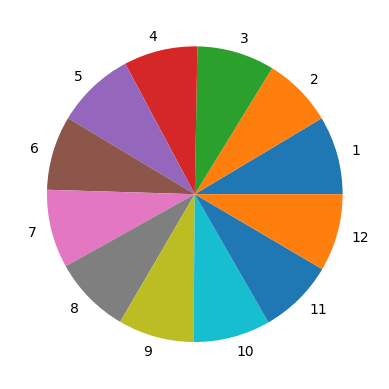

In [92]:
plt.pie(query_1d.total_price, labels = query_1d.month)
# plt.pie(query_1.total_price,query_1.district)
#plt.legend()
plt.show()

# Q2:

In [9]:
cur = con.cursor()
query = '''select c.name , sum(f.total_price)
        from ecomdb.fact_table f
        join ecomdb.coustomer_dim c on c.coustomer_key = f.coustomer_key
        group by (c.name)'''
cur.execute(query)
records = cur.fetchall()

In [11]:
query_2a = pd.DataFrame(list(records),columns = ['Coustomer_name','total_price'])
query_2a.head()

,Coustomer_name,total_price
0,maina devi,13636.50
1,pratibha devi,12703.25
2,tumpa mundal,14591.00
3,mohit maan,11591.00
4,suman devi,21477.75


In [145]:
# plt.bar(query_2.Customer_name,query_2.total_price)

In [17]:
cur = con.cursor()
query = '''select c.bank_name , sum(f.total_price)
        from ecomdb.fact_table f 
        join ecomdb.trans_dim c on c.payment_key = f.payment_key
        group by (c.bank_name)'''
cur.execute(query)
records = cur.fetchall()
#records

In [18]:
query_2b = pd.DataFrame(list(records),columns = ['bank_name','total_price'])
query_2b.head()

,bank_name,total_price
0,AB Bank Limited,2728515.50
1,Bangladesh Commerce Bank Limited,2730999.25
2,Bank Asia Limited,2687142.75
3,Bengal Commercial Bank Ltd,2704554.25
4,Bkash,2689352.50


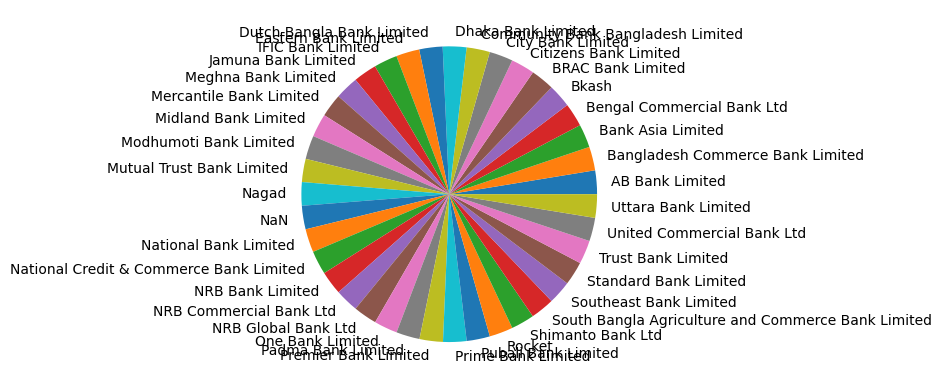

In [19]:
plt.pie(query_2b.total_price, labels = query_2b.bank_name)
plt.show()

In [20]:
cur = con.cursor()
query = '''select c.trans_type , sum(f.total_price)
        from ecomdb.fact_table f 
        join ecomdb.trans_dim c on c.payment_key = f.payment_key
        where c.trans_type = 'cash' or c.trans_type = 'mobile'
        group by (c.trans_type)'''
cur.execute(query)
records = cur.fetchall()

In [21]:
query_2c = pd.DataFrame(list(records),columns = ['trans_type','total_price'])
query_2c.head()

,trans_type,total_price
0,cash,2708515.75
1,mobile,8109881.50


# Q3:

In [24]:
cur = con.cursor()
query = '''select s.division, i.item_name, sum(f.total_price)
        from ecomdb.fact_table f 
        join ecomdb.store_dim s on s.store_key = f.store_key
        join ecomdb.item_dim i on i.item_key = f.item_key
        where s.division = 'BARISAL'
        and i.item_name = 'Pepsi - 12 oz cans'
        group by (s.division, i.item_name)'''
cur.execute(query)
records = cur.fetchall()

In [25]:
#[('BARISAL', Decimal('7520343.75'))]

In [26]:
query_3 = pd.DataFrame(list(records),columns=['division','item_name','total_sales'])
query_3.head()

,division,item_name,total_sales
0,BARISAL,Pepsi - 12 oz cans,38108.5


# Q4:

In [36]:
cur = con.cursor()
query = '''select i.supplier, t.year, sum(f.total_price)
        from ecomdb.fact_table f 
        join ecomdb.item_dim i on i.item_key = f.item_key
        join ecomdb.time_dim t on t.time_key = f.time_key
        where supplier = 'BIGSO AB' and t.year = 2015
        and i.item_name = 'Pepsi - 12 oz cans'
        group by (i.supplier, t.year)'''
cur.execute(query)
records = cur.fetchall()

In [37]:
query_4 = pd.DataFrame(list(records),columns=['supplier','year','total_sales'])
query_4.head()

,supplier,year,total_sales
0,BIGSO AB,2015,55916.25


# Q5:

In [47]:
cur = con.cursor()
query = '''select s.division, t.year, sum(f.total_price)
        from ecomdb.fact_table f 
        join ecomdb.time_dim t on t.time_key = f.time_key
        join ecomdb.store_dim s on s.store_key = f.store_key
        where division = 'DHAKA' and t.year = 2015
        group by (s.division, t.year)'''
cur.execute(query)
records = cur.fetchall()

In [48]:
query_5 = pd.DataFrame(list(records),columns = ['division','year','total_sales'])
query_5.head()

,division,year,total_sales
0,DHAKA,2015,5865078.75


# Q6:

In [49]:
cur = con.cursor()
query = '''select i.supplier, i.item_name, sum(f.quantity)
        from ecomdb.fact_table f 
        join ecomdb.item_dim i on f.item_key = i.item_key
        group by (i.supplier, i.item_name, f.quantity)
        order by (i.supplier, f.quantity) desc'''
cur.execute(query)
records = cur.fetchall()

In [50]:
#[('BARISAL', Decimal('2015'), Decimal('1076902.75'))]

In [51]:
query_6 = pd.DataFrame(list(records),columns = ['supplier','item_name','quantity'])
query_6.head()

,supplier,item_name,quantity
0,NINGBO SEDUNO IMP & EXP CO.LTD,Hefty Cmprtmnt Plates Foam 10',3674
1,NINGBO SEDUNO IMP & EXP CO.LTD,Starbuck's Pike Place,4114
2,NINGBO SEDUNO IMP & EXP CO.LTD,Pepsi - 12 oz cans,3982
3,NINGBO SEDUNO IMP & EXP CO.LTD,Gatorade X-Factor Fierce Variety 20 oz,3751
4,NINGBO SEDUNO IMP & EXP CO.LTD,Truvia Natural Sweetener,3894


In [53]:
query_6 = query_6.set_index('item_name').groupby('supplier')['quantity'].nlargest(3).reset_index()
query_6

,supplier,item_name,quantity
0,BIGSO AB,Kind Bars Variety Pack 1.4 oz,4191
1,BIGSO AB,La Croix Sparkling Cran-Raspberry 12 oz,4125
2,BIGSO AB,"Dawn Ultra Dish Detergent, Original Scent",4114
3,Bolsius Boxmeer,Diet Coke - 12 oz cans,4422
4,Bolsius Boxmeer,Reese's Pieces Peanutbutter Candy,4081
5,Bolsius Boxmeer,Pure Leaf Sweet Tea 8.5oz,4026
6,"CHERRY GROUP CO.,LTD",Wonderful Pistachios (in shell),4004
7,"CHERRY GROUP CO.,LTD",Stirrers Coffee Stirs 7inch,3960
8,"CHERRY GROUP CO.,LTD",Tejava Unsweetened Black Tea 16.9oz,3905
9,CHROMADURLIN S.A.S,Planters Nut Variety Packs,4114


In [54]:
x = len(query_6)
print(x)
for i in range(0,x):
    if(i%3 != 0):
        print(i)
        query_6.iloc[i,0]=''

30
1
2
4
5
7
8
10
11
13
14
16
17
19
20
22
23
25
26
28
29


In [55]:
query_6

,supplier,item_name,quantity
0,BIGSO AB,Kind Bars Variety Pack 1.4 oz,4191
1,,La Croix Sparkling Cran-Raspberry 12 oz,4125
2,,"Dawn Ultra Dish Detergent, Original Scent",4114
3,Bolsius Boxmeer,Diet Coke - 12 oz cans,4422
4,,Reese's Pieces Peanutbutter Candy,4081
5,,Pure Leaf Sweet Tea 8.5oz,4026
6,"CHERRY GROUP CO.,LTD",Wonderful Pistachios (in shell),4004
7,,Stirrers Coffee Stirs 7inch,3960
8,,Tejava Unsweetened Black Tea 16.9oz,3905
9,CHROMADURLIN S.A.S,Planters Nut Variety Packs,4114


# Q7

In [168]:
x = input('enter a number : ')

enter a number : 450


In [57]:
cur = con.cursor()
query = '''select i.item_name
        from ecomdb.fact_table f 
        join ecomdb.trans_dim t on t.payment_key = f.payment_key
        join ecomdb.item_dim i on i.item_key = f.item_key
        join ecomdb.time_dim td on td.time_key = f.time_key
        where (t.trans_type='card' or t.trans_type='mobile') and td.date > (CURRENT_DATE - integer '{}')'''.format(x)
cur.execute(query)
records = cur.fetchall()

In [58]:
query_7 = pd.DataFrame(list(records),columns = ['item_name'])
query_7

,item_name


# Q8:

In [68]:
cur = con.cursor()
query = '''select i.item_name,
        t.quarter,
        sum(f.quantity)
        from ecomdb.fact_table f 
        join ecomdb.item_dim i on i.item_key = f.item_key
        join ecomdb.time_dim t on t.time_key = f.time_key
        group by (i.item_name , t.quarter )
        order by (i.item_name)'''
cur.execute(query)
records = cur.fetchall()

In [69]:
query_8 = pd.DataFrame(list(records),columns = ['item_name','quarter','quantity'])
query_8

,item_name,quarter,quantity
0,100% Juice Box Variety 6.75 oz,Q1,5698
1,100% Juice Box Variety 6.75 oz,Q2,5876
2,100% Juice Box Variety 6.75 oz,Q3,6045
3,100% Juice Box Variety 6.75 oz,Q4,5806
4,A&W Root Beer - 12 oz cans,Q1,5965
...,...,...,...
1031,Yoplait Original Yogurt Variety Pack,Q4,5737
1032,Zoo Animal Cookies/Crackers,Q1,5462
1033,Zoo Animal Cookies/Crackers,Q2,5508
1034,Zoo Animal Cookies/Crackers,Q3,5701


In [169]:
query_8 = query_8.set_index('quarter').groupby("item_name")['quantity'].nsmallest(1).reset_index()
query_8

,item_name,quarter,quantity
0,100% Juice Box Variety 6.75 oz,Q1,5698
1,A&W Root Beer - 12 oz cans,Q2,5735
2,A&W Root Beer Diet - 12 oz cans,Q4,5589
3,Advil 2 pill packets,Q1,5453
4,All Purpose Cleaner 409 Spray,Q1,5325
...,...,...,...
254,Welch's 100% Juice Variety10 oz,Q2,5494
255,Wint O Green LifeSavers Sugar Free,Q1,5323
256,Wonderful Pistachios (in shell),Q1,5578
257,Yoplait Original Yogurt Variety Pack,Q1,5426


# Q9:

In [70]:
cur = con.cursor()
query = '''select i.item_name, s.division, sum(f.total_price)
        from ecomdb.fact_table f 
        join ecomdb.item_dim i on i.item_key = f.item_key
        join ecomdb.store_dim s on s.store_key = f.store_key
        group by (i.item_name, s.division)
        order by (i.item_name, s.division)'''
cur.execute(query)
records = cur.fetchall()

In [71]:
query_9 = pd.DataFrame(list(records),columns = ['item_name','division','total_sales'])
query_9

,item_name,division,total_sales
0,100% Juice Box Variety 6.75 oz,BARISAL,23790.0
1,100% Juice Box Variety 6.75 oz,CHITTAGONG,64950.0
2,100% Juice Box Variety 6.75 oz,DHAKA,141195.0
3,100% Juice Box Variety 6.75 oz,KHULNA,37755.0
4,100% Juice Box Variety 6.75 oz,RAJSHAHI,38730.0
...,...,...,...
1808,Zoo Animal Cookies/Crackers,DHAKA,118286.0
1809,Zoo Animal Cookies/Crackers,KHULNA,35434.0
1810,Zoo Animal Cookies/Crackers,RAJSHAHI,37100.0
1811,Zoo Animal Cookies/Crackers,RANGPUR,25186.0


# Q10

In [178]:
cur = con.cursor()
query = '''select   
                s.store_key,
                t.month,
                avg(f.total_price) 
                from ecomdb.fact_table f
                join ecomdb.time_dim t on t.time_key = f.time_key 
                join ecomdb.store_dim s on s.store_key = f.store_key 
                group by cube (s.store_key,t.month)    
                order by (s.store_key)'''
cur.execute(query)
records = cur.fetchall()

In [73]:
query_10 = pd.DataFrame(list(records),columns = ['store_key','month','avg_sales'])
query_10

,store_key,month,avg_sales
0,S0001,2.0,100.577670
1,S0001,3.0,109.415888
2,S0001,1.0,97.754310
3,S0001,6.0,101.245935
4,S0001,8.0,105.126953
...,...,...,...
9446,None,4.0,105.087605
9447,None,2.0,105.507782
9448,None,1.0,105.202313
9449,None,NaN,105.401436


# Customer and time dimentional finantial analytics

2135191%5 = 1 now add 1 with the result, so we get: 1+1=2.

My task is 2 no, coustomer and time dimension finantial analytics.

# Analytics 1 - Total sales by month and year

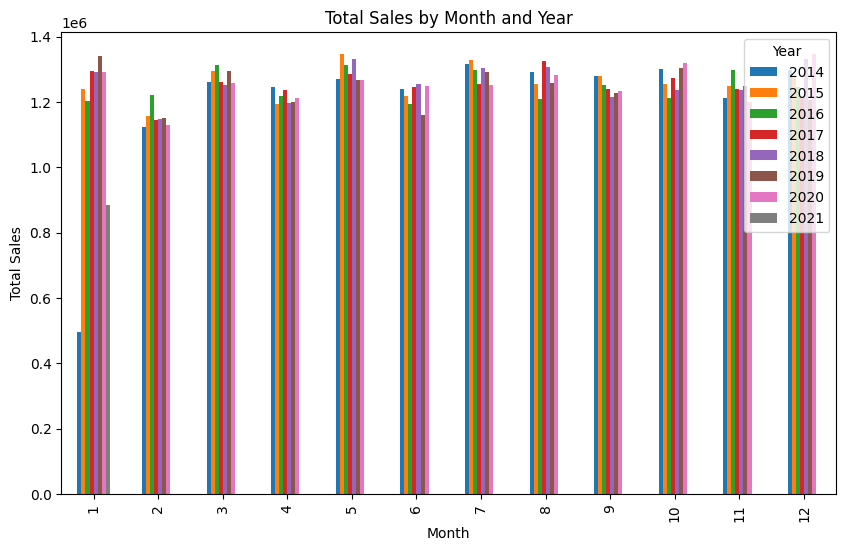

In [8]:
cur = con.cursor()
# Calculate the total sales by month and year
cur.execute('''SELECT time_dim.month, time_dim.year, SUM(fact_table.total_price) AS total_sales
               FROM ecomdb.fact_table
               INNER JOIN ecomdb.time_dim ON fact_table.time_key = time_dim.time_key
               GROUP BY time_dim.month, time_dim.year
               ORDER BY time_dim.year, time_dim.month''')
result = cur.fetchall()

# Convert the result to a Pandas DataFrame
df = pd.DataFrame(result, columns=['Month', 'Year', 'Total Sales'])

# Plot the total sales by month and year
fig, ax = plt.subplots(figsize=(10,6))
pivot_df = df.pivot(index='Month', columns='Year', values='Total Sales')
pivot_df.plot(kind='bar', ax=ax)
ax.set_title('Total Sales by Month and Year')
ax.set_xlabel('Month')
ax.set_ylabel('Total Sales')
plt.show()

# Close the database connection
cur.close()
con.close()

# Analytics 2 - Top 10 Customers by Total Spent

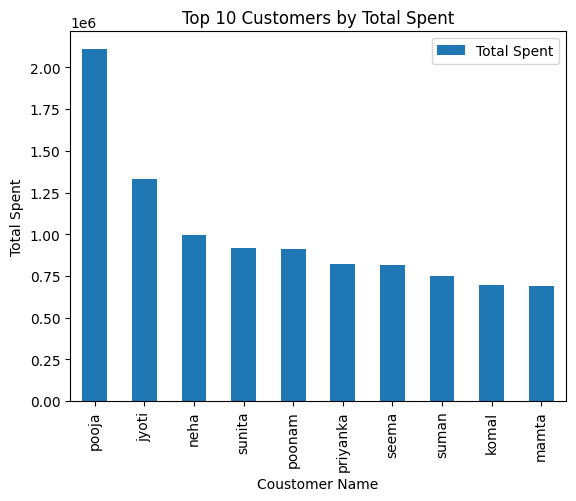

In [27]:
cur = con.cursor()

cur.execute('''SELECT c.name, SUM(f.total_price) AS total_spent
               FROM ecomdb.fact_table f
               INNER JOIN ecomdb.coustomer_dim c
               ON f.coustomer_key = c.coustomer_key
               GROUP BY c.name
               ORDER BY total_spent DESC''')
result = cur.fetchall()
cur.close()

# Convert the result to a Pandas DataFrame
df = pd.DataFrame(result, columns=['Coustomer Name', 'Total Spent'])

# Plot the top 10 customers by total spent
df.head(10).plot(kind='bar', x='Coustomer Name', y='Total Spent')
plt.title('Top 10 Customers by Total Spent')
plt.xlabel('Coustomer Name')
plt.ylabel('Total Spent')
plt.show()

# Analytics 3 - Total Revenue by Year

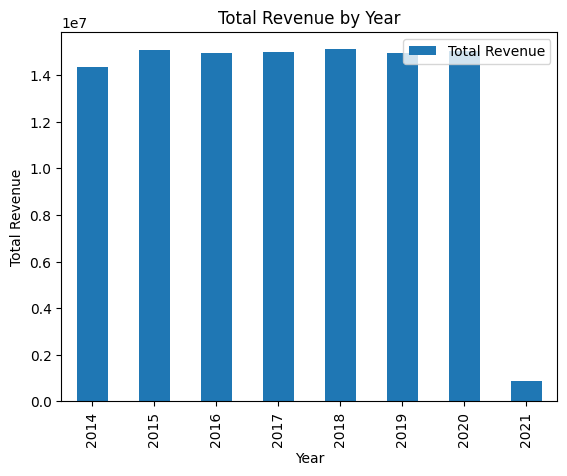

In [28]:
cur = con.cursor()
cur.execute('''SELECT time_dim.year, SUM(fact_table.total_price) AS total_revenue
               FROM ecomdb.fact_table
               INNER JOIN ecomdb.time_dim
               ON fact_table.time_key = time_dim.time_key
               GROUP BY time_dim.year''')
result = cur.fetchall()
cur.close()

# Convert the result to a Pandas DataFrame
df = pd.DataFrame(result, columns=['Year', 'Total Revenue'])

# Plot the total revenue by year
df.plot(kind='bar', x='Year', y='Total Revenue')
plt.title('Total Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

# Close the database connection
con.close()